# [Spotify Project - Group 90]

Group Members:

Deniz Hamzaoğlu - 28152

Zeynep Haykır  - 26979

Fuat Kaan Yalçın - 24969


## Introduction

<font color="blue">
The aim of this project is to analyze songs from Spotify that come from a 100-year span and make comparisons on certain aspects of the given data such as the tempo, duration, genre and acousticness. The correlations we are aiming to find include popular genres over time, the tempo depending on the seasons of the year and duration depending on the time periods. We are planning to come into these conclusions by using the Pandas query library and several others for plotting graphs to visualize the data that will be used. From the information we attain from interpreting the data, we will be able to come up with a hypothesis.

</font>

### Utilized Datasets

<font color="blue">
We have used Spotify data which is provided by CS210. We have not used any additional datasets as the dataset spans over a long time and provides many songs with pre-calculated features along with the genre information.
 
-"data.csv", Spotify dataset includes artists' names, song titles, release dates and many more. Dataset actually includes these types of informations;
 
    acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo, valence, year

</font>

## Exploratory Data Analysis

```
- Visualizations Descriptive Statistics
- Visualizations of Aggregated Forms Based on Features
- Analysis of the Most Popular Artists and Songs
```

In [ ]:
#Installing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = "data.csv" #Spotify data
df = pd.read_csv(filename)

In [ ]:
df.head()

acousticness                    artists  ...  valence  year
0      0.991000            ['Mamie Smith']  ...   0.6340  1920
1      0.643000  ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2      0.993000            ['Mamie Smith']  ...   0.6890  1920
3      0.000173        ['Oscar Velazquez']  ...   0.0422  1920
4      0.295000                   ['Mixe']  ...   0.2990  1920

[5 rows x 19 columns]

In [ ]:
df.shape

(174389, 19)

In [ ]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

---
We converted ms into minutes and added it as column named duration_min

In [ ]:
#1 min 60000 ms
l1 = df.duration_ms
l2 =[]
for element in l1: 
    a =int(element/60000)
    l2.append(a)
df["duration_min"]=l2

In [ ]:
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration_min        0
dtype: int64

### List of 25 most popular artists, their songs and features

In [ ]:
a=df.nlargest(25, ['popularity'])
a

acousticness                              artists  ...  year  duration_min
20062        0.7210                   ['Olivia Rodrigo']  ...  2021             4
19862        0.2210            ['24kGoldn', 'iann dior']  ...  2020             2
19866        0.4680                    ['Ariana Grande']  ...  2020             2
19886        0.4010         ['Bad Bunny', 'Jhay Cortez']  ...  2020             3
19976        0.2120                          ['KAROL G']  ...  2020             2
19868        0.2370                    ['Ariana Grande']  ...  2020             2
19870        0.1900                               ['CJ']  ...  2020             2
19872        0.2130                    ['The Kid LAROI']  ...  2020             2
19876        0.2180                    ['Billie Eilish']  ...  2020             2
19928        0.0303             ['Bad Bunny', 'ROSALÍA']  ...  2020             3
19878        0.6500                        ['Pop Smoke']  ...  2020             2
19900        0.7860                       ['Tate McRae']  ...  2020             2
19880        0.0194   ['Cardi B', 'Megan Thee Stallion']  ...  2020             3
19884        0.1200                        ['Lil Nas X']  ...  2020             2
19908        0.8640    ['Justin Bieber', 'benny blanco']  ...  2020             2
20068        0.1810                    ['Justin Bieber']  ...  2021             3
39252        0.4140                           ['Tiësto']  ...  2020             2
76406        0.3620                             ['Boza']  ...  2020             3
19470        0.4830                              ['Sia']  ...  2018             2
19670        0.1220                     ['Harry Styles']  ...  2019             2
19864        0.4990                              ['SZA']  ...  2020             4
19874        0.1140  ['Pop Smoke', 'Lil Baby', 'DaBaby']  ...  2020             3
19892        0.2470            ['DaBaby', 'Roddy Ricch']  ...  2020             3
19896        0.5840                       ['Conan Gray']  ...  2020             3
19924        0.0676    ['Shawn Mendes', 'Justin Bieber']  ...  2020             2

[25 rows x 20 columns]

In [ ]:
df.year.unique()

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1968, 2008, 2018, 2020, 1997, 1991, 2006, 2012,
       2011, 2007, 1967, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1992, 1993, 1994, 1995, 1996, 1998, 1999, 2000,
       2019, 2013, 2001, 2017, 2016, 2010, 2002, 2004, 2005, 2015, 2003,
       2009, 2021, 2014])

In [ ]:
df['year'].value_counts()

2020    4294
2018    2714
2013    2622
2016    2349
2019    2329
        ... 
1925     279
1924     236
1923     185
1921     156
1922     121
Name: year, Length: 102, dtype: int64

In [ ]:
df.describe() 

acousticness   danceability  ...           year   duration_min
count  174389.000000  174389.000000  ...  174389.000000  174389.000000
mean        0.499228       0.536758  ...    1977.061764       3.385036
std         0.379936       0.176025  ...      26.907950       2.489635
min         0.000000       0.000000  ...    1920.000000       0.000000
25%         0.087700       0.414000  ...    1955.000000       2.000000
50%         0.517000       0.548000  ...    1977.000000       3.000000
75%         0.895000       0.669000  ...    1999.000000       4.000000
max         0.996000       0.988000  ...    2021.000000      88.000000

[8 rows x 16 columns]

In [ ]:
df1=df[df['year']>=1920]
df1=df1.reset_index(drop=True)
df1

acousticness                             artists  ...  year  duration_min
0           0.991000                     ['Mamie Smith']  ...  1920             2
1           0.643000           ["Screamin' Jay Hawkins"]  ...  1920             2
2           0.993000                     ['Mamie Smith']  ...  1920             2
3           0.000173                 ['Oscar Velazquez']  ...  1920             7
4           0.295000                            ['Mixe']  ...  1920             2
...              ...                                 ...  ...   ...           ...
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']  ...  2020             2
174385      0.795000                    ['Alessia Cara']  ...  2021             2
174386      0.806000                       ['Roger Fly']  ...  2020             3
174387      0.920000                    ['Taylor Swift']  ...  2021             4
174388      0.239000                       ['Roger Fly']  ...  2020             3

[174389 rows x 20 columns]

In [ ]:
df1.corr()

acousticness  danceability  ...      year  duration_min
acousticness          1.000000     -0.263217  ... -0.607515     -0.085633
danceability         -0.263217      1.000000  ...  0.159095     -0.100660
duration_ms          -0.089169     -0.100757  ...  0.105661      0.993173
energy               -0.750852      0.204838  ...  0.540850      0.057367
explicit             -0.208176      0.200842  ...  0.151619     -0.035814
instrumentalness      0.221956     -0.215589  ... -0.114259      0.103105
key                  -0.028028      0.026266  ...  0.019194      0.001635
liveness             -0.029654     -0.110033  ... -0.011852      0.028263
loudness             -0.546639      0.249541  ...  0.465189      0.017338
mode                  0.064633     -0.048358  ... -0.048922     -0.045784
popularity           -0.396744      0.123746  ...  0.513227      0.021414
speechiness          -0.022437      0.239962  ... -0.215630     -0.093750
tempo                -0.223840      0.005479  ...  0.161729     -0.009257
valence              -0.166968      0.536713  ... -0.049578     -0.182542
year                 -0.607515      0.159095  ...  1.000000      0.101678
duration_min         -0.085633     -0.100660  ...  0.101678      1.000000

[16 rows x 16 columns]

---
### Categorizing the Years

We categorized years in 10s. As the dataset spans over a long time and we wanted to make graphs that are easier to comprehend. 


In [ ]:
l3=[]
l3=df1.year
l4=[]
for element in l3:
    #print(element)
    #print(type(element))
    a=element
    if a>=2000 and a<2010  :
        l4.append("2000s")
    elif a>=2010 and a<2020 :
        l4.append("2010s")
    elif a>=2020 and a<2030 :
         l4.append("2020s")
    elif a<2000 and a>=1990:
         l4.append("1990s")
    elif a<1990 and a>=1980:
         l4.append("1980s")
    elif a<1980 and a>=1970:
         l4.append("1970s")     
    elif a<1970 and a>=1960:
         l4.append("1960s") 
    elif a<1960 and a>=1950:
         l4.append("1950s") 
    elif a<1950 and a>=1940:
         l4.append("1940s")   
    elif a<1940 and a>=1930:
         l4.append("1930s") 
    elif a<1930 and a>=1920:
         l4.append("1920s")         
df1["year_as_category"]=l4
df1

acousticness  ... year_as_category
0           0.991000  ...            1920s
1           0.643000  ...            1920s
2           0.993000  ...            1920s
3           0.000173  ...            1920s
4           0.295000  ...            1920s
...              ...  ...              ...
174384      0.009170  ...            2020s
174385      0.795000  ...            2020s
174386      0.806000  ...            2020s
174387      0.920000  ...            2020s
174388      0.239000  ...            2020s

[174389 rows x 21 columns]

---
### Visualizations of Aggregated Forms Based on Features

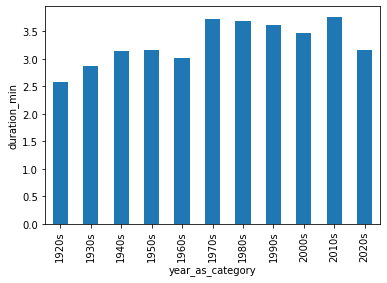

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("year_as_category")
plt.ylabel("duration_min")
p1=df1.groupby('year_as_category')['duration_min'].sum()/df1.groupby('year_as_category')['duration_min'].count()
p1.plot.bar();

We see a drastic jump between 1960s and the 1970s. Until 1970s songs' durations did not exceed 3 minutes because until then, records only held up to three minutes per side.








---

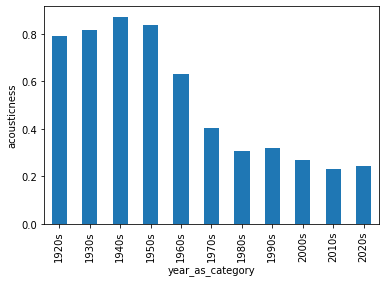

In [ ]:
plt.xlabel("year_as_category")
plt.ylabel("acousticness")
p1=df1.groupby('year_as_category')['acousticness'].sum()/df1.groupby('year_as_category')['acousticness'].count()
p1.plot.bar();

With the popularization of Jazz music, the acousticness of music showed a drastic increase during the 1930s and 40s. After that, the emergence of Classic Rock and hence the electric guitar in the 1960s later on, the popular sound moved away from acousticness.

---

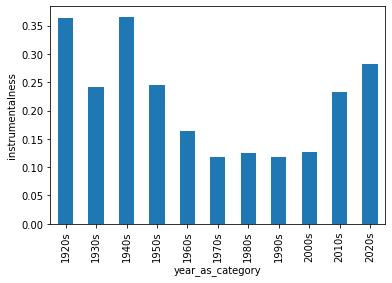

In [ ]:
plt.xlabel("year_as_category")
plt.ylabel("instrumentalness")
p1=df1.groupby('year_as_category')['instrumentalness'].sum()/df1.groupby('year_as_category')['instrumentalness'].count()
p1.plot.bar();

After 1940s, the importance of vocals gradually became more prominent in the music industry which led to a decrease in the instrumentalness of the songs, which refers to a lack of lyrics in a song. We see that it is at the bottom from the 1980s and 2000s, which corresponds to the emergence of rap music.

-----

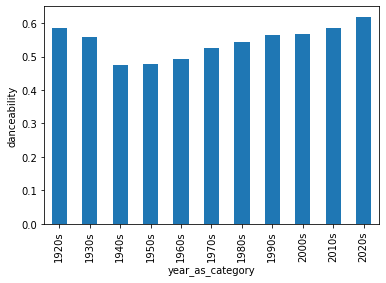

In [ ]:
plt.xlabel("year_as_category")
plt.ylabel("danceability")
p1=df1.groupby('year_as_category')['danceability'].sum()/df1.groupby('year_as_category')['danceability'].count()
p1.plot.bar();


After 1940’s the popularity of jazz decreases which had slow tempo and calm acoustics. With this change dynamic taste of music came to the forefront. 

## Hypothesis Testing


Hypothesis Test: We want to test whether there is significant differences in terms of dancebility for different popularity values.

**Null Hypothesis ($H_0$)**: Means of `popularity` samples for all danceability values are same (e.g. $di_1$ denotes 1st popularity sample)

$ H_0: \mu_{di_1} = \mu_{di_2} $

**Alternative Hypothesis ($H_A$)**: Means of `popularity` samples for all danceability values are different.

$ H_A:$ Means $\mu_{di_1}, \mu_{di_2}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
df['popularity'].describe()

count    174389.000000
mean         25.693381
std          21.872740
min           0.000000
25%           1.000000
50%          25.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

In [ ]:
p_m = df['popularity'].mean() 
p_m

25.693380889849703

In [ ]:
l3=[]
l3=df1.popularity
l5=[]
for element in l3:
    #print(element)
    #print(type(element))
    a=int(element)
    if a < p_m:
        l5.append("low")
    elif a >= p_m:
        l5.append("high")
             
df1["popularity_as_category"]=l5
df1

acousticness  ... popularity_as_category
0           0.991000  ...                    low
1           0.643000  ...                    low
2           0.993000  ...                    low
3           0.000173  ...                    low
4           0.295000  ...                    low
...              ...  ...                    ...
174384      0.009170  ...                    low
174385      0.795000  ...                    low
174386      0.806000  ...                    low
174387      0.920000  ...                   high
174388      0.239000  ...                    low

[174389 rows x 22 columns]

In [ ]:
from numpy import nan
l3=[]
l3=df1.popularity
h=[]
l=[]

for element in l3:
    #print(element)
    #print(type(element))
    a=int(element)
    if a < p_m:
        l.append(a)
        h.append(nan) 
    elif a >= p_m:
        h.append(a)
        l.append(nan)
          
df1["popularity_high"]=h
df1["popularity_low"]=l
df1

acousticness  ... popularity_low
0           0.991000  ...           12.0
1           0.643000  ...            7.0
2           0.993000  ...            4.0
3           0.000173  ...           17.0
4           0.295000  ...            2.0
...              ...  ...            ...
174384      0.009170  ...            0.0
174385      0.795000  ...            0.0
174386      0.806000  ...            0.0
174387      0.920000  ...            NaN
174388      0.239000  ...            0.0

[174389 rows x 24 columns]

**For the T-test, we divided the popularity values into two groups according to their comparison with the mean value. The "popularity_as_category" column is to understand if a value is greater or smaller than the mean value.**

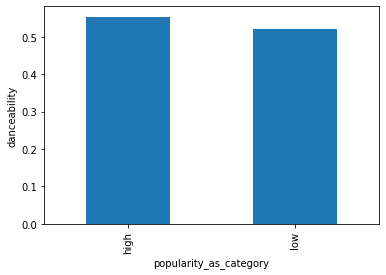

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("popularity_as_category")
plt.ylabel("danceability")
p1=df1.groupby('popularity_as_category')['danceability'].sum()/df1.groupby('popularity_as_category')['danceability'].count()
p1.plot.bar();

We divided the popularity values into two groups that show us whether they are greater or smaller than the mean value and wanted to visualize the difference between them.




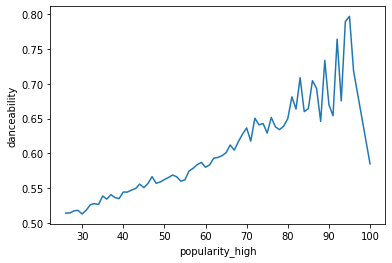

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("popularity_as_category")
plt.ylabel("danceability")
p1=df1.groupby('popularity_high')['danceability'].sum()/df1.groupby('popularity_high')['danceability'].count()
p1.plot.line();

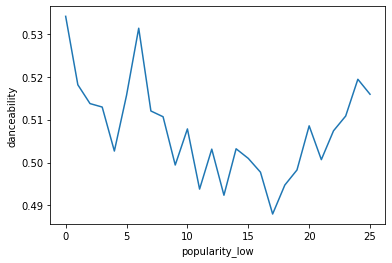

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("popularity_as_category")
plt.ylabel("danceability")
p1=df1.groupby('popularity_low')['danceability'].sum()/df1.groupby('popularity_low')['danceability'].count()
p1.plot.line();

Here, we used a line graph to see the relationship between danceability and the high and low popularity values.

In [ ]:
ttype = "danceability"

highs = df1[df1["popularity_as_category"] == "high"][ttype] #high
lows = df1[df1["popularity_as_category"] == "low"][ttype]  # low

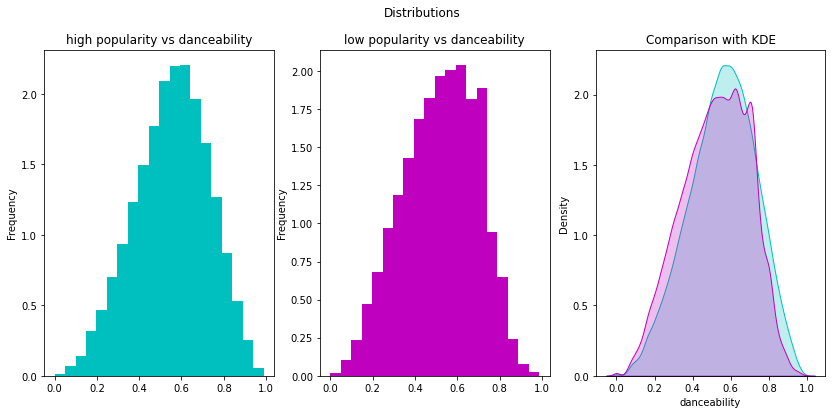

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
highs.plot(kind="hist", ax=ax[0], bins=20, label="high", color="c", density=True)
ax[0].set_title("high popularity vs danceability")

lows.plot(kind="hist", ax=ax[1], bins=20, label="low", color="m", density=True)
ax[1].set_title("low popularity vs danceability")

sns.kdeplot(highs, shade=True, label="high popularity", ax=ax[2], color="c")
sns.kdeplot(lows, shade=True, label="low popularity", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Distributions")
plt.show()

As it can be seen in the graphs above, songs with high popularity are more frequent compared to songs with low popularity.


###T-Test and P-Value

In [ ]:
from scipy import stats
t, p = stats.ttest_ind(highs,lows, equal_var=False)
print(t)
print(p)
if p/2 < 0.05:
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

39.86317840717655
0.0
we are rejecting null hypothesis


**Value Interpretation:**
Since our p-value is very near 0 and also smaller than 0.05 which is the threshold value, we reject the null hypothesis. 
Since our p-value is very near 0 and also smaller than 0.05 which is the threshold value, we reject the null hypothesis. 


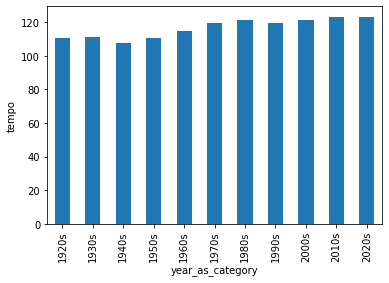

In [ ]:
plt.xlabel("year_as_category")
plt.ylabel("tempo")
p1=df1.groupby('year_as_category')['tempo'].sum()/df1.groupby('year_as_category')['tempo'].count()
p1.plot.bar();

In [ ]:
df['tempo'].describe() 

count    174389.000000
mean        117.006500
std          30.254178
min           0.000000
25%          93.931000
50%         115.816000
75%         135.011000
max         243.507000
Name: tempo, dtype: float64

In [ ]:
t_mean = df['tempo'].mean() 
t_mean

117.0064997964312

In [ ]:
l3=[]
l3=df1.tempo
l5=[]
for element in l3:
    #print(element)
    #print(type(element))
    a=int(element)
    if a < t_mean:
        l5.append("low")
    elif a >= t_mean:
        l5.append("high")
             
df1["tempo_as_category"]=l5
df1

acousticness  ... tempo_as_category
0           0.991000  ...              high
1           0.643000  ...               low
2           0.993000  ...               low
3           0.000173  ...              high
4           0.295000  ...              high
...              ...  ...               ...
174384      0.009170  ...              high
174385      0.795000  ...               low
174386      0.806000  ...               low
174387      0.920000  ...              high
174388      0.239000  ...               low

[174389 rows x 25 columns]

**For the T-test, we divided the tempo values into two groups according to their comparison with the mean value. The "tempo_as_category" column is to understand if a value is greater or smaller than the mean value.**

---



In [ ]:
from numpy import nan
l3=[]
l3=df1.tempo
h=[]
l=[]

for element in l3:
    #print(element)
    #print(type(element))
    a=int(element)
    if a < t_mean:
        l.append(a)
        h.append(nan) 
    elif a >= t_mean:
        h.append(a)
        l.append(nan)
          
df1["tempo_high"]=h
df1["tempo_low"]=l
df1

acousticness                             artists  ...  tempo_high  tempo_low
0           0.991000                     ['Mamie Smith']  ...       149.0        NaN
1           0.643000           ["Screamin' Jay Hawkins"]  ...         NaN       86.0
2           0.993000                     ['Mamie Smith']  ...         NaN       97.0
3           0.000173                 ['Oscar Velazquez']  ...       127.0        NaN
4           0.295000                            ['Mixe']  ...       122.0        NaN
...              ...                                 ...  ...         ...        ...
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']  ...       125.0        NaN
174385      0.795000                    ['Alessia Cara']  ...         NaN       94.0
174386      0.806000                       ['Roger Fly']  ...         NaN      108.0
174387      0.920000                    ['Taylor Swift']  ...       171.0        NaN
174388      0.239000                       ['Roger Fly']  ...         NaN      112.0

[174389 rows x 27 columns]

Hypothesis Test: We want to test whether there is significant differences in terms of tempo for different eras.

**Null Hypothesis ($H_0$)**: Means of `year_as_category` samples for all tempo values are same (e.g. $ti_1$ denotes 1st tempo sample)

$ H_0: \mu_{ti_1} = \mu_{ti_2} $

**Alternative Hypothesis ($H_A$)**: Means of `year_as_category` samples for all tempo values are different.

$ H_A:$ Means $\mu_{ti_1}, \mu_{ti_2}$ are not same.

**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

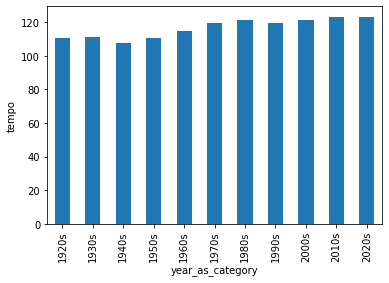

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("year_as_category")
plt.ylabel("tempo")
p1=df1.groupby('year_as_category')['tempo'].sum()/df1.groupby('year_as_category')['tempo'].count()
p1.plot.bar();

In this graph, we explored the relationship between decades and the tempo of the music that was released. As it can be seen, the highest tempo is in the 2010s.

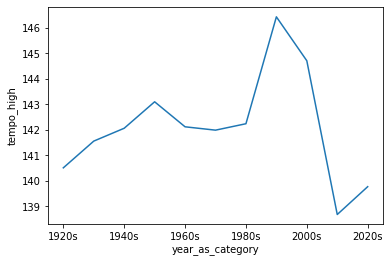

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("year_as_category")
plt.ylabel("tempo_high")
p1=df1.groupby('year_as_category')['tempo_high'].sum()/df1.groupby('year_as_category')['tempo_high'].count()
p1.plot.line();

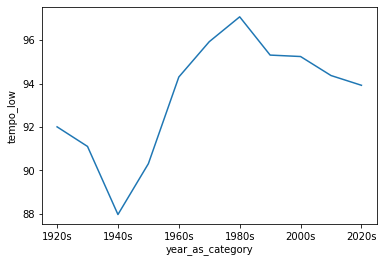

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("year_as_category")
plt.ylabel("tempo_low")
p1=df1.groupby('year_as_category')['tempo_low'].sum()/df1.groupby('year_as_category')['tempo_low'].count()
p1.plot.line();


We wanted to see the relationship between the high and low values of tempo in relation to the eras mentioned in the graphs.



In [ ]:
ttype = "year"

highs = df1[df1["tempo_as_category"] == "high"][ttype] #high
lows = df1[df1["tempo_as_category"] == "low"][ttype]  # low

In [ ]:
from scipy import stats
t, p = stats.ttest_ind(highs,lows, equal_var=False)
print(t)
print(p)
if p/2 < 0.05:
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

71.01041942408752
0.0
we are rejecting null hypothesis


**Value Interpretation:**
Since our p-value is very near 0 and also smaller than 0.05 which is the threshold value, we reject the null hypothesis. 




## Machine Learning

In [ ]:
df1.to_csv("update.csv")

In [ ]:
df1.shape


(174389, 27)

In [ ]:
del df1["duration_ms"]

In [ ]:

del df1["key"]
del df1["liveness"]
del df1["mode"]
del df1["loudness"]

In [ ]:
del df1["energy"]
del df1["release_date"]
del df1["valence"]
del df1["popularity_high"]
del df1["popularity_low"]
del df1["tempo_low"]
del df1["tempo_high"]
del df1["explicit"]
del df1["speechiness"]






In [ ]:
df1

acousticness  ... tempo_as_category
0           0.991000  ...              high
1           0.643000  ...               low
2           0.993000  ...               low
3           0.000173  ...              high
4           0.295000  ...              high
...              ...  ...               ...
174384      0.009170  ...              high
174385      0.795000  ...               low
174386      0.806000  ...               low
174387      0.920000  ...              high
174388      0.239000  ...               low

[174389 rows x 12 columns]

We deleted the unnecessary columns on our data so that it wouldn't take too much space in the model.

In [ ]:
df1.loc[df1['popularity'] < p_m, 'popularity'] = 0 
df1.loc[df1['popularity'] >= p_m, 'popularity'] = 1
df1.loc[df1['popularity'] == 1]

acousticness  ... tempo_as_category
477          0.99600  ...               low
478          0.98400  ...               low
479          0.99600  ...               low
481          0.99200  ...               low
483          0.99500  ...               low
...              ...  ...               ...
174351       0.00984  ...              high
174353       0.71500  ...               low
174355       0.49800  ...              high
174361       0.10500  ...              high
174387       0.92000  ...              high

[86974 rows x 12 columns]

In [ ]:
df1.loc[df1["tempo_as_category"] == 'high', "tempo_as_category"] = 1
df1.loc[df1["tempo_as_category"] == 'low', "tempo_as_category"] = 0
df1.sample(5)

acousticness  ... tempo_as_category
140836       0.00092  ...                 1
142680       0.03150  ...                 1
80967        0.99500  ...                 0
8591         0.66400  ...                 1
28886        0.94200  ...                 1

[5 rows x 12 columns]

In [ ]:
del df1["artists"]
del df1["name"]

df1

acousticness  danceability  ...  popularity_as_category  tempo_as_category
0           0.991000         0.598  ...                     low                  1
1           0.643000         0.852  ...                     low                  0
2           0.993000         0.647  ...                     low                  0
3           0.000173         0.730  ...                     low                  1
4           0.295000         0.704  ...                     low                  1
...              ...           ...  ...                     ...                ...
174384      0.009170         0.792  ...                     low                  1
174385      0.795000         0.429  ...                     low                  0
174386      0.806000         0.671  ...                     low                  0
174387      0.920000         0.462  ...                    high                  1
174388      0.239000         0.677  ...                     low                  0

[174389 rows x 10 columns]

For the columns that had binary options such as high and low, we replaced "high" with 1 and "low" with 0 so that our dataframe becomes simpler.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
features = ["acousticness", "danceability", "duration_min", "instrumentalness", "tempo","year"]

In [ ]:
training = df1.sample(frac = 0.8,random_state = 500)
X_train = training[features]
y_train = training['popularity']
X_test = df1.drop(training.index)[features]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 500)

In [ ]:
y_train

172957    1
82997     0
133420    1
137063    1
102174    1
         ..
42448     0
145514    0
92484     1
121400    1
156230    0
Name: popularity, Length: 111608, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.8529190409633373
AUC: 0.8530060241689931


In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.824642511557897
AUC: 0.824737478541863


In [ ]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train,y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.796509335913701
AUC: 0.7965018932666587


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

year                0.457845
acousticness        0.156697
instrumentalness    0.106750
tempo               0.089574
danceability        0.072233
danceability        0.071640
duration_min        0.045260
dtype: float64

No handles with labels found to put in legend.


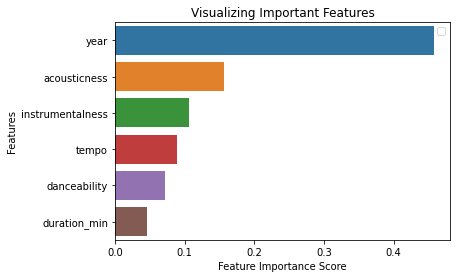

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
topFeatures=["year", "acousticness", "instrumentalness"]

In [ ]:
training = df1.sample(frac = 0.8,random_state = 500)
X_train = training[features]
y_train = training['popularity']
X_test = df1.drop(training.index)[features]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 500)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.8534207791276923
AUC: 0.8535068026559771


In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.824642511557897
AUC: 0.824737478541863


In [ ]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train,y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.7984446116904992
AUC: 0.7984335224765864


In [ ]:
model_performance_accuracy = pd.DataFrame({'Model': ['RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'Accuracy': [RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy]})

In [ ]:
model_performance_AUC = pd.DataFrame({'Model': ['RandomForestClassifier', 
                                                'KNeighborsClassifier',
                                                'DecisionTreeClassifier'],
                                            'AUC': [RFC_AUC,
                                                    KNN_AUC,
                                                    DT_AUC,]})

In [ ]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

Model  Accuracy
0  RandomForestClassifier  0.853421
1    KNeighborsClassifier  0.824643
2  DecisionTreeClassifier  0.798445

In [ ]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

Model       AUC
0  RandomForestClassifier  0.853507
1    KNeighborsClassifier  0.824737
2  DecisionTreeClassifier  0.798434

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
df1.corr()

In [ ]:
plt.figure(figsize=[7,5])
sns.heatmap(df1.corr())
plt.show()

In [ ]:
rec = song_pivot.iloc[1,]

In [ ]:
neighbors=[]
for item in indices[0][1:]:
    neighbors.append(song[song.index == item].rec_id[0])
neighbors

In [ ]:
neighbor_songs=pd.DataFrame(columns=['id', 'listen_count','artists','song'])
for item in neighbors:
    neighbor_songs=neighbor_songs.append(song[song.user_id == item],ignore_index = True)
neighbor_songs

In [ ]:
Recommended_Song=neighbor_songs['Song'][0:10]
print(Recommended_Song)

### Conclusion
Using a dataset of Spotify, we were able to predict popularity of the songs(greater than popularity mean) using metrics such as "acousticness", "danceability", "duration_min", "instrumentalness", "tempo", "year". The Random Forest Classifier was the best performing algorithm with 92.0% accuracy and 86.4% AUC. The Decision Tree Classifier was the second best performing algorithm with 87.5% accuracy and 85.8% AUC. These results we acquired from different machine learning models helped us create a simple song recommendaytion system where we could give a small playlist of songs that are somewhat similar to the one that is entered by the user. From this project, we as a group had a better understanding of Data Science while analyzing the song data coming from Spotify. We analyzed the data by first visualizing, then hypothesizing and testing our hypotheses and finally we worked on several machine learning models with several different combinations of features. In the end, we acquired accuracy results and gave a list of recommended songs by using the Nearest Neighbor algoritm and other algorithms.